In [1]:
__depends__=[]
__dest__="../results/sample_exp_plot.pdf"

# Make Plot from Experimental Data
Build a plot from some data that we have supplied ahead of time.

In [2]:
import pickle
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context(context='paper',font_scale=2.5)
%matplotlib inline

First, load the data.

In [3]:
with open('../results/static/sample_exp_data.pickle','rb') as f:
    results = pickle.load(f)

Next, fit the data with `curve_fit` module in SciPy.

In [4]:
def linear_fit(x,a,b):
    return a*x + b

In [5]:
pop,covar = scipy.optimize.curve_fit(linear_fit,results['x'],results['y'])

Now, pull out the fitted curve

In [6]:
y_fit = linear_fit(results['x'],*pop)

Finally, build the plot and save it.

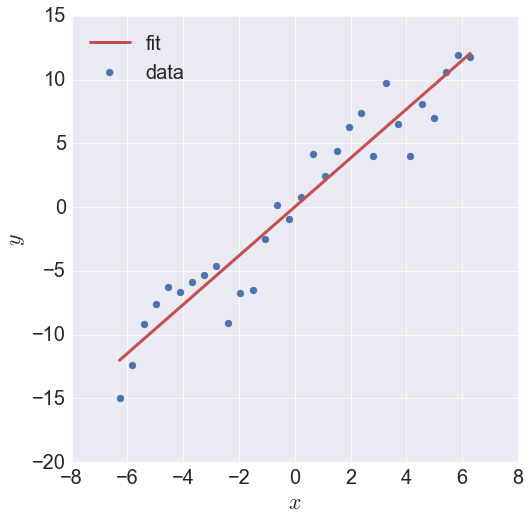

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.scatter(results['x'],results['y'],marker='.',s=200,label='data',color=seaborn.color_palette('deep')[0])
ax.plot(results['x'],y_fit,linewidth=3,color=seaborn.color_palette('deep')[2],label='fit')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend(loc='best')
plt.savefig(__dest__,format='pdf',dpi=1000)
plt.show()